In [2]:
import pandas as pd
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\ADMIN\Downloads\insurance (1).csv")

In [4]:
data.head(4)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [5]:
data.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
gender={'female':1,'male':0}
data.replace({'sex':gender},inplace=True)


In [7]:
data['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

In [8]:
data.tail(8)

,age,sex,bmi,children,smoker,region,charges
1330,57,1,25.74,2,no,southeast,12629.16560
1331,23,1,33.40,0,no,southwest,10795.93733
1332,52,1,44.70,3,no,southwest,11411.68500
1333,50,0,30.97,3,no,northwest,10600.54830
1334,18,1,31.92,0,no,northeast,2205.98080
1335,18,1,36.85,0,no,southeast,1629.83350
1336,21,1,25.80,0,no,southwest,2007.94500
1337,61,1,29.07,0,yes,northwest,29141.36030


In [9]:
data.shape

(1338, 7)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [11]:
data.describe()

,age,sex,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,13270.422265
std,14.049960,0.500160,6.098187,1.205493,12110.011237
min,18.000000,0.000000,15.960000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,63770.428010


In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
data1=data.drop(['region'],axis=1)

In [14]:
data2=pd.get_dummies(data1)

In [15]:
data2.head(5)

,age,sex,bmi,children,charges,smoker_no,smoker_yes
0,19,1,27.900,0,16884.92400,0,1
1,18,0,33.770,1,1725.55230,1,0
2,28,0,33.000,3,4449.46200,1,0
3,33,0,22.705,0,21984.47061,1,0
4,32,0,28.880,0,3866.85520,1,0


In [16]:
x=data2.drop(['charges'],axis=1)

In [17]:
y=data2['charges']

In [18]:
y.head(4)

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
Name: charges, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [21]:
x_train.shape

(1003, 6)

In [22]:
y_train.shape

(1003,)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
r=LinearRegression()

In [25]:
reg=r.fit(x_train,y_train)

In [26]:
y_pred=r.predict(x_test)

In [27]:
y_pred

array([ 3319.4025471 ,  9809.24477839, 39237.01219475,  4377.15369413,
        8914.38030371, 13484.18602641,  4097.93156143, 15160.9284529 ,
       10494.19199754, 34720.86762714,  5490.66124089, 11710.99351014,
        8354.3280695 ,  8919.45449408, 10887.36866532,  7348.92801991,
        1218.8634368 ,  6947.07073913,  7820.53023905, 12180.39173567,
        8619.47715004, 33240.57996639, 15186.5089513 , 31487.1987912 ,
       12544.66784028, 17113.27678264, 30863.52838148, 10122.82028498,
        3943.87082597, 13749.02456038,  8324.37024984, 12743.3679053 ,
        6923.44533102,  3275.23810715, 11185.85985295,  5940.66717169,
        5308.34307274, 12123.88735435, 37614.36255835, 10251.13808118,
       35667.31424959,   560.05616593,  8218.46284842,  8942.55127394,
        4640.03718456,  8277.11363361,  9152.45224542, 12703.01943455,
       13105.42357656, 11540.20971203,  4385.628456  , 38642.90839567,
       10024.66405496, 18878.59699233, 15716.48028176, 12402.95947916,
      

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7040911996613195

In [29]:
from sklearn.metrics import mean_squared_error #calculating MSE
mean_squared_error(y_pred,y_test)

38006334.109479874

In [30]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,910,2639.04290,3319.402547,0
1,823,8219.20390,9809.244778,1
2,677,46130.52650,39237.012195,2
3,559,1646.42970,4377.153694,3
4,1169,6112.35295,8914.380304,4
5,649,12430.95335,13484.186026,5
6,241,5354.07465,4097.931561,6
7,458,10601.41200,15160.928453,7
8,370,13415.03810,10494.191998,8
9,655,24667.41900,34720.867627,9


[]

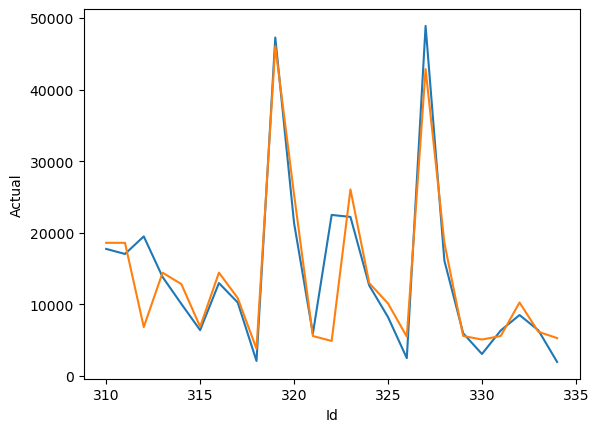

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Actual',data=Results.tail(25))
sns.lineplot(x='Id',y='Predicted',data=Results.tail(25))
plt.plot()

# Ridge

In [32]:
from sklearn.model_selection import GridSearchCV
#from sklearn.grid_search import GridSearchCV


from sklearn.linear_model import Ridge

alpha = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20,30]

ridge = Ridge()

parameters = {'alpha': alpha}

ridge_regressor = GridSearchCV(ridge, parameters)

ridge_regressor.fit(x_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20, 30]})

In [33]:
ridge_regressor.best_params_

{'alpha': 1}

In [34]:
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)
y_pred_ridge=ridge.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error
Ridge_Error=mean_squared_error(y_pred_ridge,y_test)
Ridge_Error

37963285.24131542

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_ridge)

0.7044263685018024

In [37]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_ridge
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,910,2639.04290,3337.539650,0
1,823,8219.20390,9822.097018,1
2,677,46130.52650,39180.182776,2
3,559,1646.42970,4396.296993,3
4,1169,6112.35295,8928.040178,4
5,649,12430.95335,13496.535480,5
6,241,5354.07465,4110.168261,6
7,458,10601.41200,15178.796309,7
8,370,13415.03810,10504.785588,8
9,655,24667.41900,34658.973233,9


[]

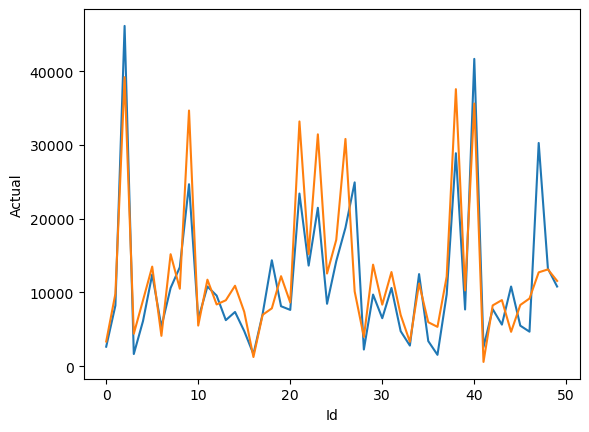

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='Id',y='Actual',data=Results.head(50))
sns.lineplot(x='Id',y='Predicted',data=Results.head(50))
plt.plot()

# ElasticNet

In [39]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}

elastic_regressor = GridSearchCV(elastic, parameters)

elastic_regressor.fit(x_train, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]})

In [40]:
elastic_regressor.best_params_

{'alpha': 0.001}

In [41]:
elastic=ElasticNet(alpha=.001)
elastic.fit(x_train,y_train)
y_pred_elastic=elastic.predict(x_test)

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_elastic)

0.7042608118882446

In [43]:
elastic_Error=mean_squared_error(y_pred_elastic,y_test)
elastic_Error

37984549.22522435

In [44]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred_elastic
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,910,2639.04290,3328.492728,0
1,823,8219.20390,9815.683732,1
2,677,46130.52650,39208.533891,2
3,559,1646.42970,4386.748373,3
4,1169,6112.35295,8921.224327,4
5,649,12430.95335,13490.373901,5
6,241,5354.07465,4104.062722,6
7,458,10601.41200,15169.883918,7
8,370,13415.03810,10499.500298,8
9,655,24667.41900,34689.849398,9


[]

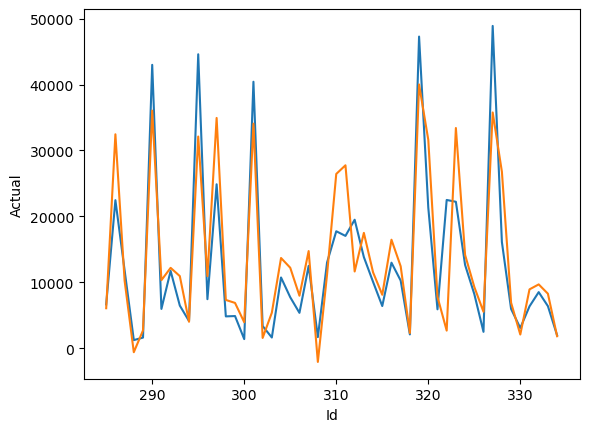

In [45]:
sns.lineplot(x='Id',y='Actual',data=Results.tail(50))
sns.lineplot(x='Id',y='Predicted',data=Results.tail(50))
plt.plot()


# RANDOMFORESTREGRESSION

In [46]:
from sklearn.model_selection import GridSearchCV #GridSearchCV is for parameter tuning
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
n_estimators=[25,50,75,100,125,150,175,200] #number of decision trees in the forest, default = 100
criterion=['squared_error'] #criteria for choosing nodes default = 'gini'
max_depth=[3,5,10] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
parameters={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth}  
RFC_reg = GridSearchCV(reg, parameters)
RFC_reg.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]})

In [47]:
RFC_reg.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'n_estimators': 100}

In [48]:
reg=RandomForestRegressor(n_estimators=75,criterion='squared_error',max_depth=3)

In [49]:
reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=75)

In [50]:
y_pred=reg.predict(x_test)

In [51]:
y_pred

array([ 4395.44150462,  9717.37606093, 46054.52500158,  3594.94168083,
        6184.80176708, 13073.6603956 ,  6138.30813944, 12981.04185191,
       14378.65988224, 26048.99233349,  6840.37358703, 12526.92690175,
       10888.47891319,  6184.80176708, 10052.21359435,  6138.30813944,
        3594.94168083,  6184.80176708,  6138.30813944, 10888.47891319,
        9461.025155  , 26048.99233349, 14378.65988224, 18788.99323028,
       10888.47891319, 14378.65988224, 25849.29062291,  6840.37358703,
        3800.79599615, 10263.2631938 ,  6184.80176708, 12981.04185191,
        6097.48121941,  5622.82804837, 12891.84151668,  4891.6526369 ,
        3800.79599615, 12526.92690175, 26048.99233349,  6886.86721467,
       44737.69086042,  3800.79599615,  6886.86721467,  6138.30813944,
        5028.1825399 ,  6184.80176708,  6799.54666701, 14135.55066803,
       14135.55066803, 12981.04185191,  4891.6526369 , 45804.20981369,
       10888.47891319, 14433.19043375, 10888.47891319, 10052.21359435,
      

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.842156218880714

In [53]:
Results= pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']=y_test
Results['Predicted']=y_pred
Results=Results.reset_index()
Results['Id']=Results.index
Results.head(10)

,index,Actual,Predicted,Id
0,910,2639.04290,4395.441505,0
1,823,8219.20390,9717.376061,1
2,677,46130.52650,46054.525002,2
3,559,1646.42970,3594.941681,3
4,1169,6112.35295,6184.801767,4
5,649,12430.95335,13073.660396,5
6,241,5354.07465,6138.308139,6
7,458,10601.41200,12981.041852,7
8,370,13415.03810,14378.659882,8
9,655,24667.41900,26048.992333,9


[]

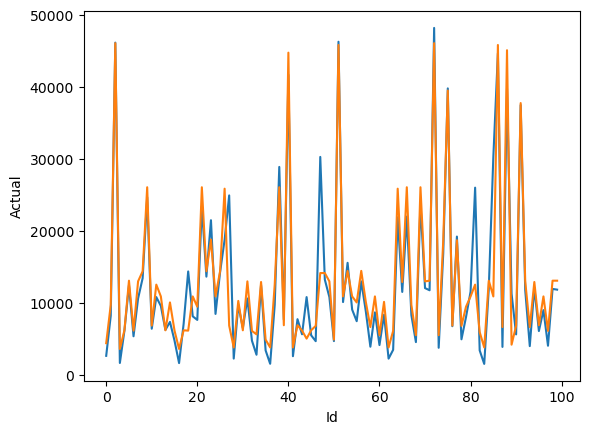

In [54]:
sns.lineplot(x='Id',y='Actual',data=Results.head(100))
sns.lineplot(x='Id',y='Predicted',data=Results.head(100))
plt.plot()

In [55]:
filename='new_medical_insurance'
pickle.dump(reg,open(filename,'wb'))

In [56]:
x_test.head()

,age,sex,bmi,children,smoker_no,smoker_yes
910,22,0,28.310,1,1,0
823,44,1,29.810,2,1,0
677,60,0,31.350,3,0,1
559,19,0,35.530,0,1,0
1169,37,1,34.105,1,1,0


In [57]:
[['23,25.123,1,1,1,0,1'],['44,29.143,0,0,0,1,1']]

[['23,25.123,1,1,1,0,1'], ['44,29.143,0,0,0,1,1']]